Step 4

In [164]:
##imports##
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math


Step 5

In [169]:
##read data##

#step 8#
file_path_layout_0 = "##place your file path here##"
file_path_data_0 =  "##place your file path here##"

file_path_layout_1 = "##place your file path here##"
file_path_data_1 = "##place your file path here##"

file_path_layout_2 = "##place your file path here##"
file_path_data_2 = "##place your file path here##"

##if file .txt and not .csv then include an r before the ""parentheses""
##thus it will be 
##file_path_data = r"##please input the file path or the file name##"

##copy and paste this as many times as the files you have
##if you have 4 files make sure there are 8 file paths, 4 for the data, 4 for the layout


df_plate_reader_layout_0 = pd.read_csv(file_path_layout_0)
df_plate_reader_data_0 = pd.read_csv(file_path_data_0)

df_plate_reader_layout_1 = pd.read_csv(file_path_layout_1)
df_plate_reader_data_1 = pd.read_csv(file_path_data_1)

df_plate_reader_layout_2 = pd.read_csv(file_path_layout_2)
df_plate_reader_data_2 = pd.read_csv(file_path_data_2)

Step 6

In [170]:
##change the size of the dictionary depending on how many files you have imported, thus if you have 4 plate reader data, 
## your dictionary size should be 4 with a list of 2 dataframes at each index
a_dict_of_all_data = {
    0: [df_plate_reader_layout_0, df_plate_reader_data_0], 
    1: [df_plate_reader_layout_1, df_plate_reader_data_1],
    2: [df_plate_reader_layout_2, df_plate_reader_data_2]  
                      }

Step 7

Functions

In [148]:
## Is Nan function

def isNaN(num):
    return num != num

In [149]:
##function that finds the number of groups in the layout
def unique_samples_from_plate_layout(df):
    df = df.iloc[:, 1:].reset_index(drop=True)
    samples = set()

    for i in range(df.shape[0] - 1):
        for j in range(df.shape[1] - 1):
            unique_sample = df.iloc[i, j]

            if pd.isna(unique_sample):
                continue

            samples.add(unique_sample)

    return list(samples)

In [150]:
##finding values in the data that are mapped to the same layout position
def find_values(string, layout, data_frame):
    layout = layout.iloc[:, 1:]
    data_frame = data_frame.iloc[:, 1:]
    values = []

    for ii in range(layout.shape[0]):
        for jj in range(layout.shape[1]):
            if layout.iloc[ii, jj] == string:
                values.append(data_frame.iloc[ii, jj])

    return values

In [151]:
##Function that enumerates through the groups of the layout
##Extracts the data in the corresponding plate map
##placing this information into the correct column
def developing_new_df_from_input_data(layout, data_plate_reader):
    column_titles = unique_samples_from_plate_layout(layout)
    num_rows = layout.shape[0]
    num_cols = layout.shape[1]

    df = pd.DataFrame(index=range(num_rows), columns=column_titles)

    for ii, title in enumerate(column_titles):
        cell_position = 0

        for jj in range(num_rows):
            for kk in range(num_cols):
                if layout.iloc[jj, kk] == title:
                    df.iloc[cell_position, ii] = data_plate_reader.iloc[jj, kk]
                    cell_position += 1

    return df

In [152]:
##A function to obtain the original density after a dilution
def get_OD(ratio, cell_position):
    ratio_nums = ratio.split(':')
    multiplyer = int (int(ratio_nums[1]) / int(ratio_nums[0]) )
    a = multiplyer*cell_position
    return a

In [153]:
##Function to calculate the original density and put it into the dataframe
def calculate_the_original_density(df, columns_names_ajusted, diluted_to):
    for ii in range(len(columns_names_ajusted)):

        name = columns_names_ajusted[ii]

        df[str(name)] = get_OD(str(diluted_to[ii]), df[str(name)])
        
    return df

In [154]:
def finding_statistically_significant_groups_update(list_of_columns, p_value, dataframe_df, scaling_factor):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import itertools
    import scipy.stats as stats

    # Set up the plot
    sns.set(style='whitegrid')
    fig, axes = plt.subplots(1, 1, figsize=(12, 6), dpi=600)
    new_df = dataframe_df[list_of_columns]
    # Find the column with the maximum non-NaN values
    new_df = new_df.dropna(how='all')
    
    # Plot the data
    sns.boxplot(data=new_df, ax=axes)

    boxplot_height = axes.get_ylim()[1]  # Get the maximum height of the box plots
    line_offset = scaling_factor  # Adjust this value to control the spacing between the lines
    

    for i in range(len(list_of_columns)):
        for j in range(i+1, len(list_of_columns)):
            t_stat, p_val = stats.ttest_ind(new_df.iloc[:, i], new_df.iloc[:, j])

            p_text = ""  # Initialize p_text with an empty string

            if p_val <= p_value:
                x_pos = (i + j) / 2
                y_pos = boxplot_height + line_offset

                if p_val <= 0.0001:
                    p_text = "****"

                elif p_val <= 0.001:
                    p_text = "***"

                elif p_val <= 0.01:
                    p_text = "**"

                else:
                    p_text = "*"

                plt.text(x_pos, y_pos, p_text, ha='center', va='bottom', fontsize=12)
                plt.plot([i, j], [y_pos, y_pos], 'k--')
                line_offset += scaling_factor  # Increase the line offset for the next line
                legend_entries = [
                    " * : p ≤ 0.05 ",
                    " ** : p ≤ 0.01 ",
                    " *** : p ≤ 0.001 ",
                    " **** : p ≤ 0.0001 "
                ]
            
                axes.legend(legend_entries, loc='upper right', fontsize=8, handlelength=0, handletextpad=0, markerscale=0, columnspacing=0, borderaxespad=0, bbox_to_anchor=(1, 1))

    return fig, axes

In [155]:
##Function that enumerates through the groups of the layout
##Extracts the data in the corresponding plate map
##placing this information into the correct column
def developing_new_df_from_input_data(layout, data_plate_reader):
    column_titles = unique_samples_from_plate_layout(layout)
    num_rows = layout.shape[0]
    num_cols = layout.shape[1]

    df = pd.DataFrame(index=range(num_rows), columns=column_titles)

    for ii, title in enumerate(column_titles):
        cell_position = 0

        for jj in range(num_rows):
            for kk in range(num_cols):
                if layout.iloc[jj, kk] == title:
                    df.iloc[cell_position, ii] = data_plate_reader.iloc[jj, kk]
                    cell_position += 1

    return df

In [156]:
##Function that enumerates through the groups of the layout
##Extracts the data in the corresponding plate map
##placing this information into the correct column
def developing_new_df_from_multi_input_data(a_dictionary):
    ##looping through how many files we have
    for xx in range(len(a_dictionary)):

        ##Creating the initial dataframe from the first data and layout
        if xx==0:
            #identifying the unique columns
            column_titles = unique_samples_from_plate_layout(a_dictionary[xx][0])

            ##determining the shape of this dataframe
            num_rows = a_dictionary[xx][0].shape[0]
            num_cols = a_dictionary[xx][0].shape[1]

            ##creating an empty dataframe the size determined above
            df = pd.DataFrame(index=range(num_rows), columns=column_titles)

            ##iterating through each of the column names, extracting that data from the layout and the same position in the data, and placing this into the column with the respective name
            for ii, title in enumerate(column_titles):
                cell_position = 0

                for jj in range(num_rows):
                    for kk in range(num_cols):
                        if a_dictionary[xx][0].iloc[jj, kk] == title:
                            df.iloc[cell_position, ii] = a_dictionary[xx][1].iloc[jj, kk]
                            cell_position += 1

        
        else:
            ##identifing unique column names for the subsequent data layouts 
            new_column_titles = unique_samples_from_plate_layout(a_dictionary[xx][0])

            ##creating a new dataframe containing the names of the columns that have been renamed
            new_df = pd.DataFrame(index=range(num_rows), columns=new_column_titles)
            
            ##iterating through each of the column names, extracting that data from the layout and the same position in the data, and placing this into the column with the respective name
            for ii, title in enumerate(new_column_titles):
                cell_position = 0

                for jj in range(num_rows):
                    for kk in range(num_cols):
                        if a_dictionary[xx][0].iloc[jj, kk] == title:
                            new_df.iloc[cell_position, ii] = a_dictionary[xx][1].iloc[jj, kk]
                            cell_position += 1

            ##concatenating these newly made dataframes
            df = pd.concat([df, new_df], axis=1)

    # Find the column with the maximum non-NaN values
    df_cleaned = df.dropna(how='all')

    names_of_all_the_columns = list(df_cleaned.columns) #finding all of the column names
    distinct_column_names = list(set(names_of_all_the_columns)) #getting only the distinct names of the columns

    for i in range(len(distinct_column_names)):
        column_name = distinct_column_names[i]
        num_columns = df_cleaned[column_name].shape[1]
        
        for ii in range(num_columns):
            values_to_extract = df_cleaned[column_name].iloc[:, ii]
            number = ii + 1  # Increment the number for each new column
            
            new_column_name = f'{column_name}+plate+{number}'
            df_cleaned[new_column_name] = values_to_extract

        df_cleaned.drop(columns=[column_name], inplace=True)

    return df_cleaned

In [ ]:
##this will be a function where columns can be combined 
##this will help when multiple people are have varying naming convenitons
def renaming_columns_of_a_dataframe(dataframe, dictionary_column_names):
    names_that_are_the_same = list(dictionary_column_names.values())
    names_they_should_be = list(dictionary_column_names.keys())

    for ii in range(len(names_they_should_be)):
        column_values = []  # List to store values from all columns with the same name
        num_columns = dataframe[names_that_are_the_same[ii]].shape[1]  # Get the number of columns with the same name
        
        # Iterate through each column with the same name and extract values
        for jj in range(num_columns):
            column_values.append(dataframe[names_that_are_the_same[ii]].iloc[:, jj].tolist())  # Convert to list
                
        flattened_list = [item for sublist in column_values for item in sublist]
            
        if len(flattened_list) == len(dataframe.index):
            dataframe = dataframe.drop(names_that_are_the_same[ii], axis=1)
            dataframe[names_they_should_be[ii]] = flattened_list
        elif len(flattened_list) > len(dataframe.index):
            # Insert NaN values to replace missing values of the dataframe
            cleaned_list = [value for value in flattened_list if not pd.isnull(value)]

            df1 = pd.DataFrame({names_they_should_be[ii]:cleaned_list})
            dataframe = dataframe.drop(names_that_are_the_same[ii], axis=1)
            # Reindex the smaller dataframe with NaN values to match the larger dataframe's index
            dataframe = dataframe.reindex(df1.index, fill_value=np.nan)
            # Concatenate the dataframes along rows
            dataframe = pd.concat([df1, dataframe], axis=1)

        elif len(flattened_list) < len(dataframe.index):        
            num_nan_values = len(dataframe.index) - len(flattened_list)
            extended_list = flattened_list + [np.nan] * num_nan_values
            if len(extended_list) != len(dataframe.index):
                extended_list = extended_list[:len(dataframe.index)]  # Trim the list if it's still too long
            dataframe[names_they_should_be[ii]] = extended_list
        
    return dataframe

In [ ]:
def fold_change_function(numerator, denominator, dataframe):
    den_avg_val =df[denominator].mean()

    # Find the column with the maximum non-NaN values
    dataframe = dataframe[numerator].dropna(how = 'all')

    for i in range(dataframe.shape[1]):
        dataframe.iloc[:,i] = dataframe.iloc[:,i] / den_avg_val

    return dataframe


Step 8

In [157]:
df = developing_new_df_from_multi_input_data(a_dict_of_all_data)

Step 9

In [158]:
print(df)
print(df.columns)

  1:1 (300uL) T1 blank (200ul) 1:5 (300uL) T1 1:5 (200uL) T1 1:1 (200uL) T1  \
0          0.623        -0.002           0.15          0.098          0.398   
1          0.677        -0.002          0.154          0.059          0.358   
2            NaN        -0.003            NaN            NaN            NaN   
3            NaN        -0.003            NaN            NaN            NaN   
4            NaN           NaN            NaN            NaN            NaN   

  blank (300ul) 1:10 (200uL) T2 1:10 (300uL) T1 1:10 (200uL) T1  \
0         0.001           0.048           0.075           0.051   
1         0.003           0.039            0.08           0.022   
2           0.0             NaN             NaN             NaN   
3         0.004             NaN             NaN             NaN   
4           NaN             NaN             NaN             NaN   

  1:1 (200uL) T2  ... Control T2 (100uL) DPBS (300uL) DPBS (200uL)  \
0           0.46  ...              1.974       -0.02

Step 10

In [159]:
naming_convention_df = {

    ##column name of the product## : ##a list of the column names that will be merged together##
    "##example": ['#example1', '#example2']
    
}

In [162]:
df = renaming_columns_of_a_dataframe(df, naming_convention_df)


['blank', '1:10', '1:1', '1:5', 'DPBS', '3HC', 'Control']
[['blank (300ul)', 'blank (200ul)'], ['1:10 (300uL) T2', '1:10 (200uL) T2', '1:10 (200uL) T1', '1:10 (300uL) T1'], ['1:1 (200uL) T1', '1:1 (300uL) T2', '1:1 (200uL) T2', '1:1 (300uL) T1'], ['1:5 (200uL) T1', '1:5 (200uL) T2', '1:5 (300uL) T1', '1:5 (300uL) T1', '1:5 (300uL) T2'], ['DPBS (100uL)', 'DPBS (300uL)', 'DPBS (200uL)'], ['3HC T1 (100uL)', '3HC T1 (300uL)', '3HC T1 (200uL)'], ['Control T2 (300uL)', 'Control T2 (200uL)', 'Control T1 (300uL)', 'Control T2 (100uL)', 'Control T1 (100uL)', 'Control T1 (200uL)']]


Step 11

In [17]:
df = renaming_columns_of_a_dataframe(df, naming_convention_df)

Step 12:

In [19]:
columns_need_to_be_adjusted = [
    #name of the column to be adjusted
    "#example column name#",
    '#example 1 column name'
    
    ]
diluted_from_original_density = [
    #examples of dilution factor
    
    '1:5', 
    '1:10'
    ]


In [20]:
df = calculate_the_original_density(df,columns_need_to_be_adjusted, diluted_from_original_density)

In [21]:
print(df)

    Control    3HC   DPBS    1:5    1:1  1:10  blank
0     1.407  1.654  0.030  0.490  0.398  0.81  0.001
1     1.396  2.087  0.029  0.295  0.358  0.85  0.003
2     1.492  1.757  0.034  0.525  0.654  0.48  0.000
3     1.594  2.002 -0.021  0.440  0.686  0.39  0.004
4     1.593  1.953 -0.200  0.750  0.460  0.51 -0.002
5     1.404  1.864 -0.022  0.770  0.408  0.22 -0.002
6     0.974  1.982 -0.010  0.750  0.623  0.75 -0.003
7     0.930  2.020 -0.010  0.770  0.677  0.80 -0.003
8     0.971    NaN    NaN    NaN    NaN   NaN    NaN
9     1.974    NaN    NaN    NaN    NaN   NaN    NaN
10    1.885    NaN    NaN    NaN    NaN   NaN    NaN
11    2.215    NaN    NaN    NaN    NaN   NaN    NaN
12    2.144    NaN    NaN    NaN    NaN   NaN    NaN
13    2.990    NaN    NaN    NaN    NaN   NaN    NaN
14    4.018    NaN    NaN    NaN    NaN   NaN    NaN
15    1.927    NaN    NaN    NaN    NaN   NaN    NaN
16    2.801    NaN    NaN    NaN    NaN   NaN    NaN
17    2.730    NaN    NaN    NaN    NaN   NaN 

Step 13

In [22]:
df.columns

Index(['Control', '3HC', 'DPBS', '1:5', '1:1', '1:10', 'blank'], dtype='object')

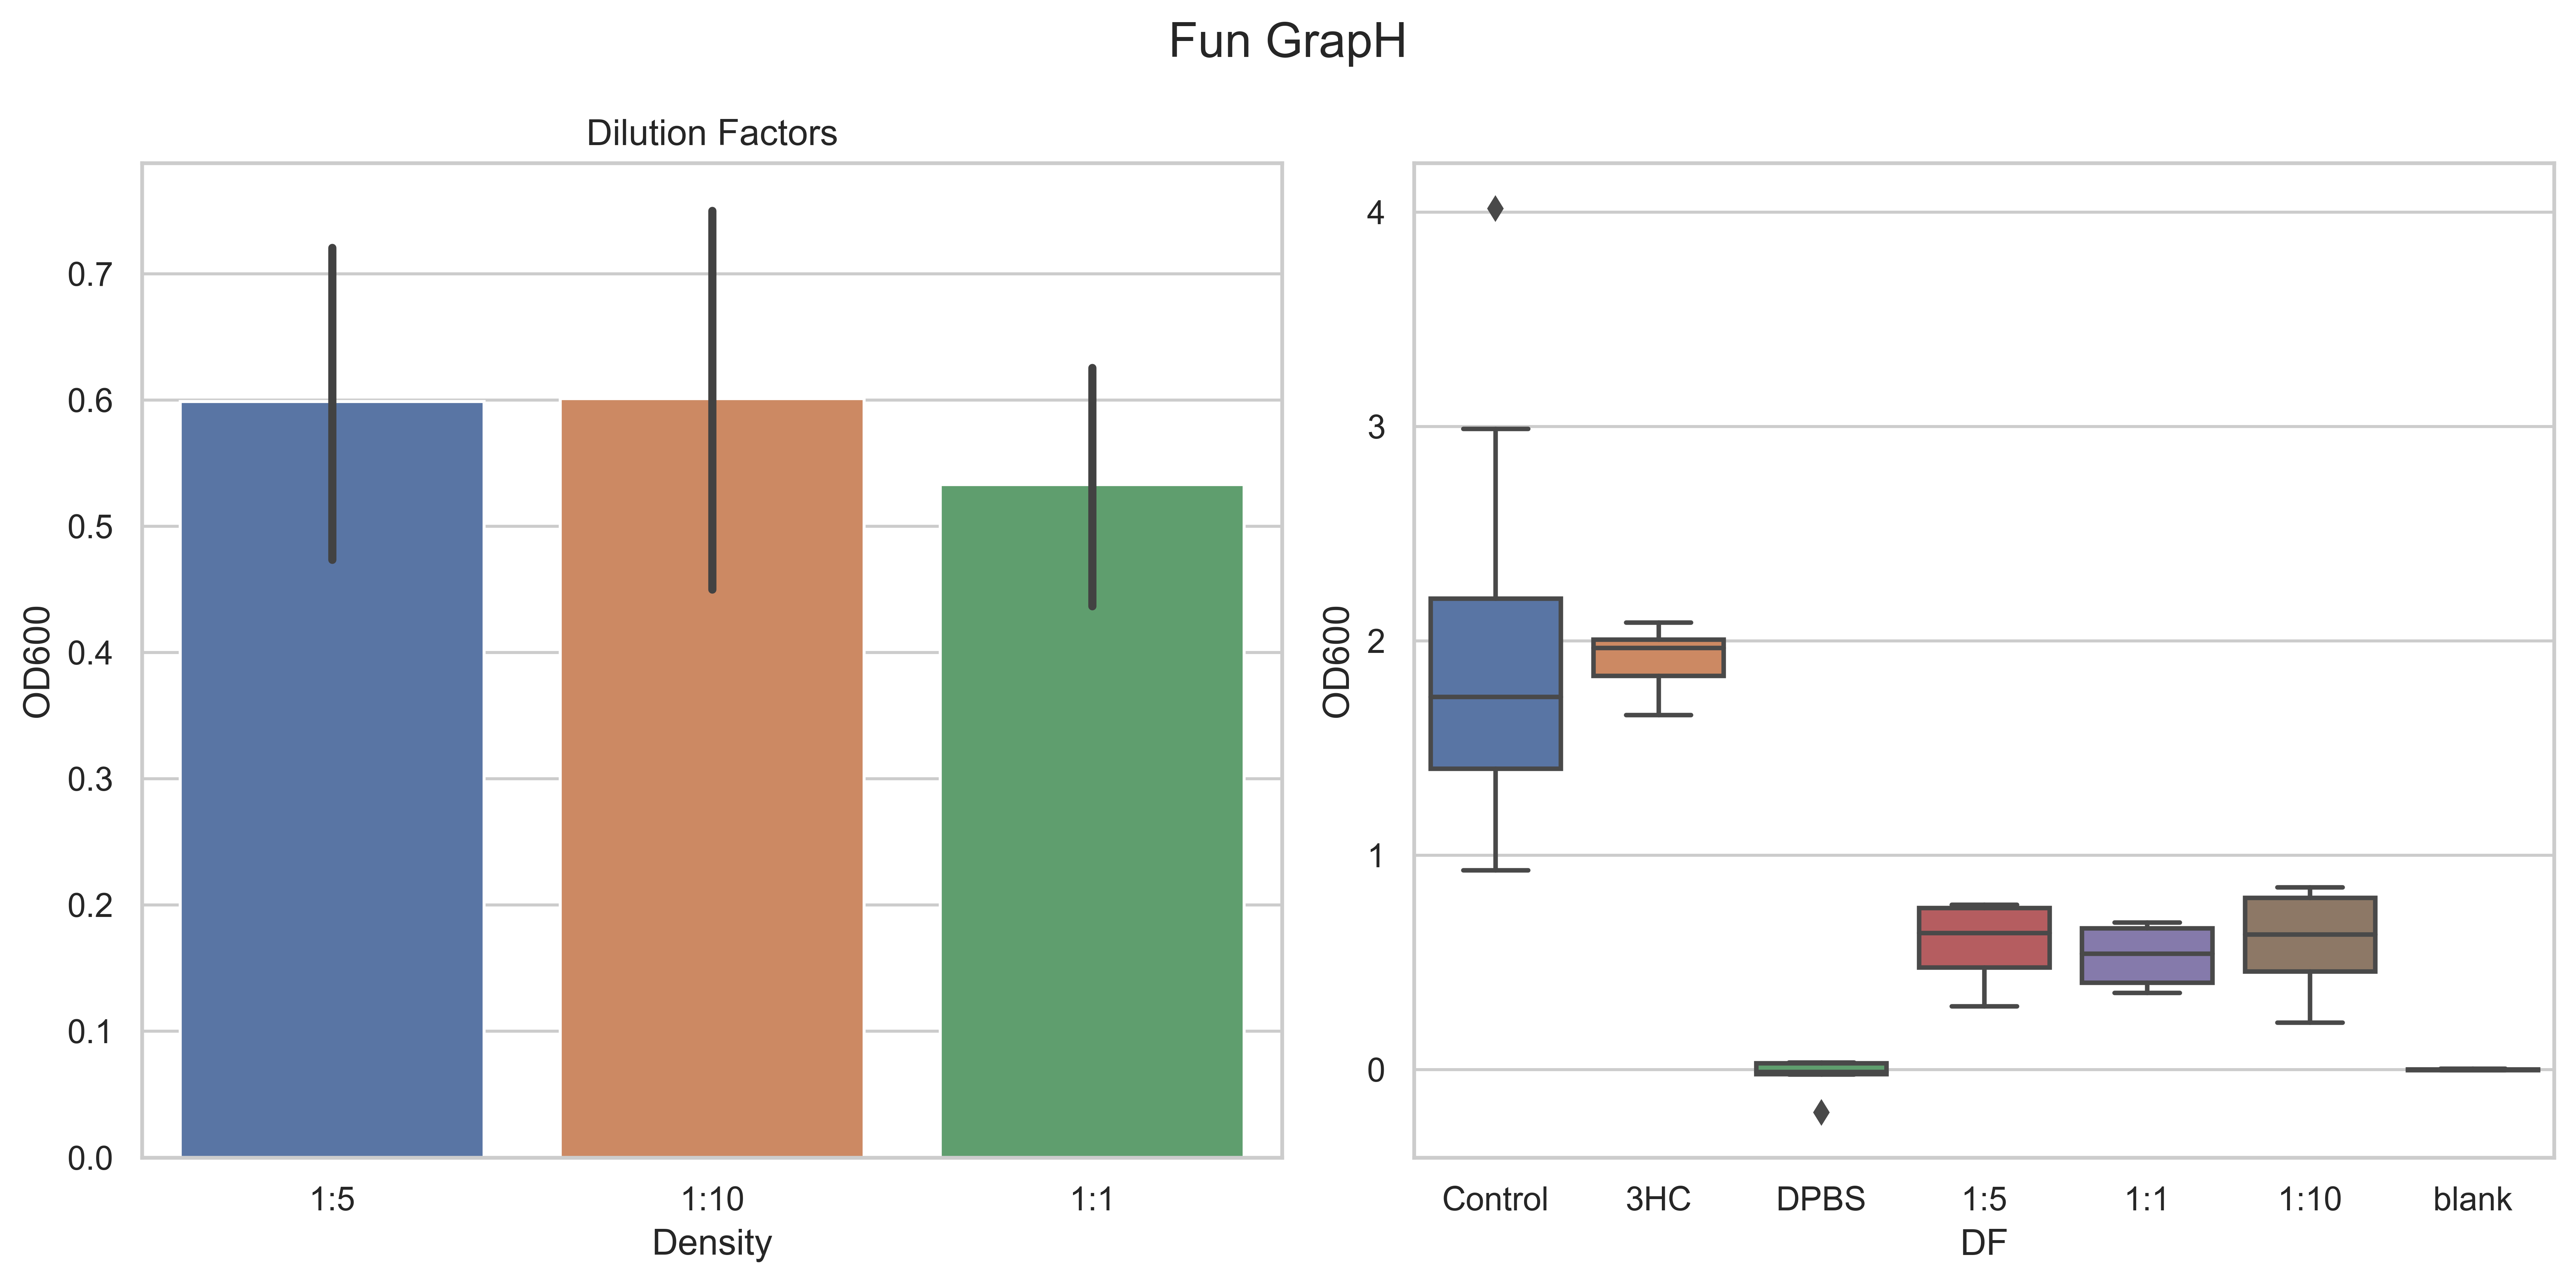

In [23]:
##Graphing the data

#set up the style, personally I am a fan of 'whitegrid'
sns.set(style='whitegrid')

#setting up the figure, axes, and figure size
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi = 600)

#Choosing the graphs and the x-axis groupins
graph1 = [define list of values to compare]
graph2 = [define list of values to compare]


#plotting the data
sns.boxplot(data=df[graph1], ax=axes[1])
sns.barplot(data=df[graph2], ax=axes[0])


#choosing the labels and titles
axes[0].set_xlabel('set xlabel')
axes[0].set_ylabel('#set ylabel')
axes[0].set_title('#set title')


axes[1].set_xlabel('#set xlabel')
axes[1].set_ylabel('#set y label')



#figure supertitle
fig.suptitle(#set super title, fontsize=16)

#ploting the graphs
plt.tight_layout()
 
##saving the data and graphs

##plt.savefig('##please put the name that you want##.png' )

#showing us the data
plt.show()


Step 14

Text(0.5, 1.0, 'significance')

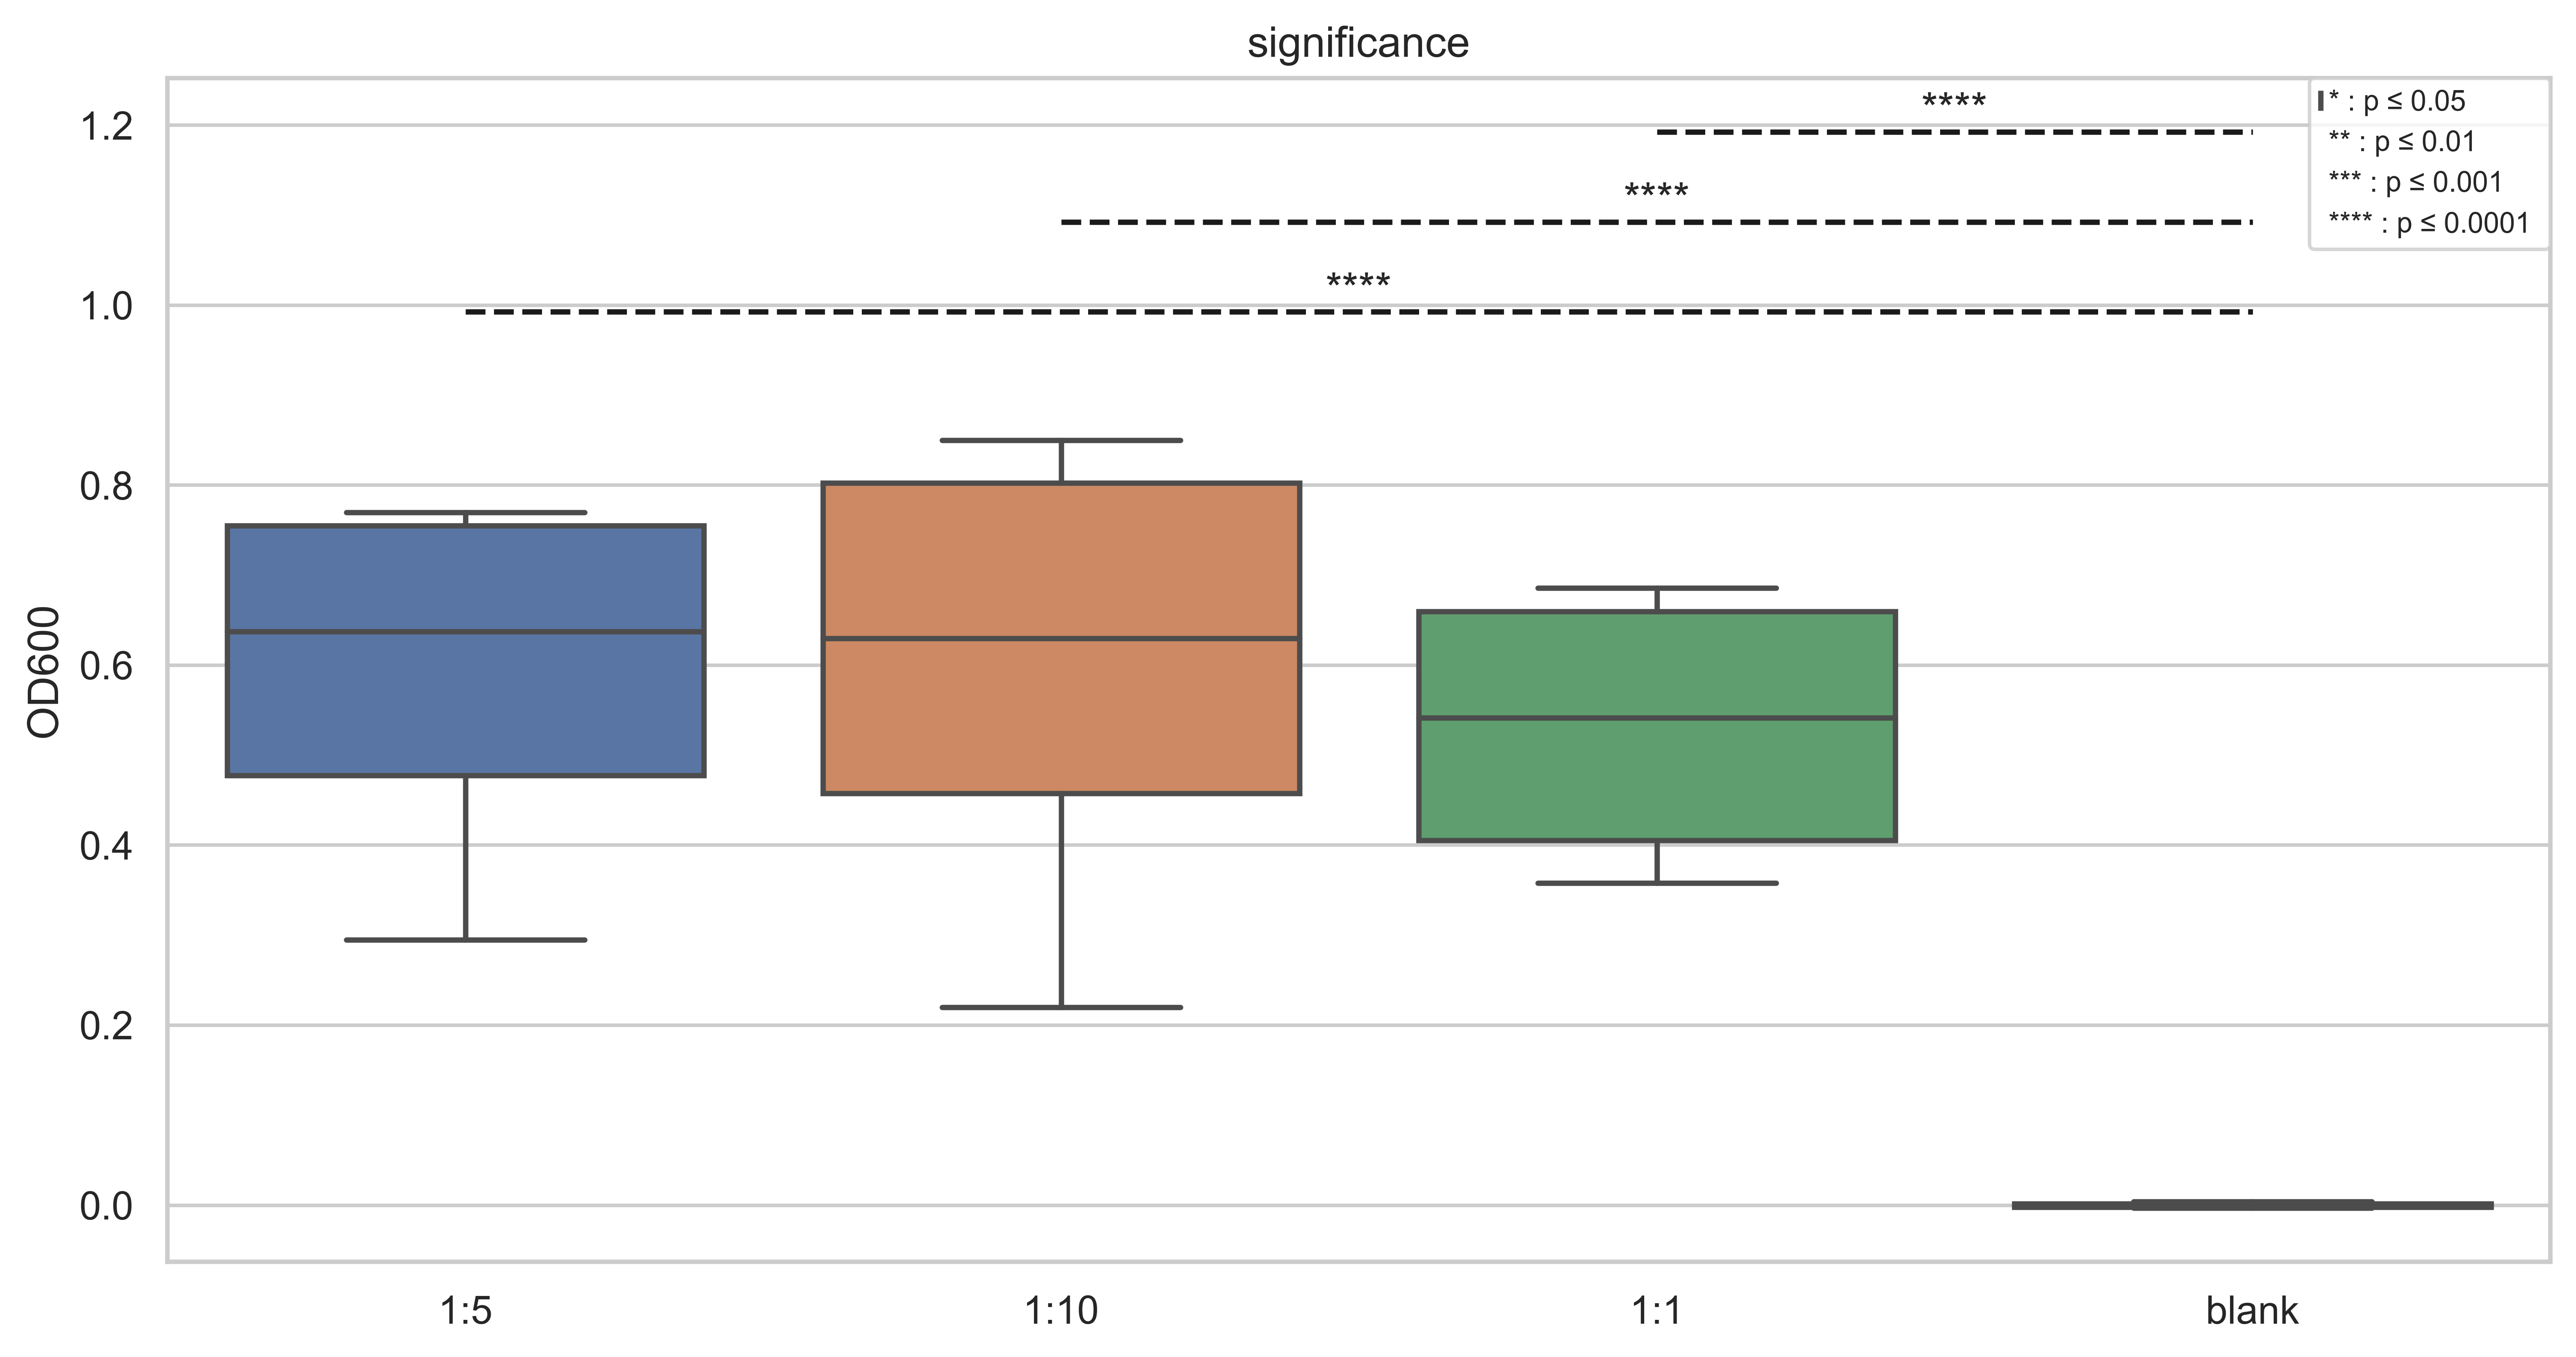

In [81]:
fig, axes = finding_statistically_significant_groups_update([#a list of columns comparing their p values], 0.05, df, #scaling factor)
axes.set_ylabel('#set y label')
axes.set_title("#set title")

##plt.savefig('##save file to name you want##.png')

In [80]:
excel_filename = '#dataname.xlsx'  # Specify the desired filename
df.to_excel(excel_filename, index=False)  # Set index=False to exclude the index column

In [82]:
df

,Control,3HC,DPBS,1:5,1:1,1:10,blank
0,1.407,1.654,0.030,0.490,0.398,0.81,0.001
1,1.396,2.087,0.029,0.295,0.358,0.85,0.003
2,1.492,1.757,0.034,0.525,0.654,0.48,0.000
3,1.594,2.002,-0.021,0.440,0.686,0.39,0.004
4,1.593,1.953,-0.200,0.750,0.460,0.51,-0.002
5,1.404,1.864,-0.022,0.770,0.408,0.22,-0.002
6,0.974,1.982,-0.010,0.750,0.623,0.75,-0.003
7,0.930,2.020,-0.010,0.770,0.677,0.80,-0.003
8,0.971,NaN,NaN,NaN,NaN,NaN,NaN
9,1.974,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
numerator_a = [
    #list of the columns that will be used for calculating fold change#
    #example list includes
    '1:5', 
    '1:1', 
    '1:10'
    ]
denominator_b = #value that will be the denominator##

fold_change_df = fold_change_function(numerator_a, denominator_b, df)

,1:5,1:1,1:10
0,0.256060,0.207984,0.423283
1,0.154159,0.187081,0.444186
2,0.274350,0.341762,0.250835
3,0.229932,0.358485,0.203803
4,0.391929,0.240383,0.266512
5,0.402381,0.213209,0.114966
6,0.391929,0.325562,0.391929
7,0.402381,0.353781,0.418058


In [106]:
def ratio_to_ratio_function(numerator_dict, denominator, df):
    
    return df

In [ ]:
ratio_to_ratio_function()